In [8]:
import numpy as np
from tensorflow.keras import datasets, utils, layers, models, optimizers

In [21]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

# mlp likes variation in [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# go one hot encoded
y_train = utils.to_categorical(y_train, NUM_CLASSES);
y_test = utils.to_categorical(y_test, NUM_CLASSES);

print(x_test.shape,
y_test.shape)

(10000, 32, 32, 3) (10000, 10)


In [9]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               614600    
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [11]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
  13/1563 [..............................] - ETA: 6s - loss: 1.3407 - accuracy: 0.5264 

2024-07-24 19:43:54.293831: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 6s 4ms/step - loss: 1.3431 - accuracy: 0.5234
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3230 - accuracy: 0.5279
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3094 - accuracy: 0.5346
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2979 - accuracy: 0.5392
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2806 - accuracy: 0.5458
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2638 - accuracy: 0.5509
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2544 - accuracy: 0.5542
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2457 - accuracy: 0.5568
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2319 - accuracy: 0.5633
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2248 - accurac

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4401 - accuracy: 0.4925


[1.4400875568389893, 0.4925000071525574]

In [26]:
# Définition des classes : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


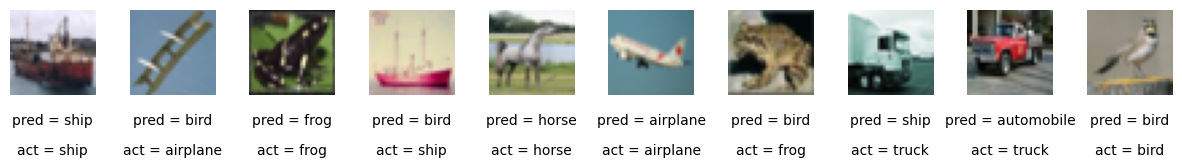

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'pred = {preds_single[idx]}', fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f'act = {actual_single[idx]}', fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)